(-3.4185244608161414,
 5.1941857664976094,
 -5.9648625362505534,
 11.173318606162054)

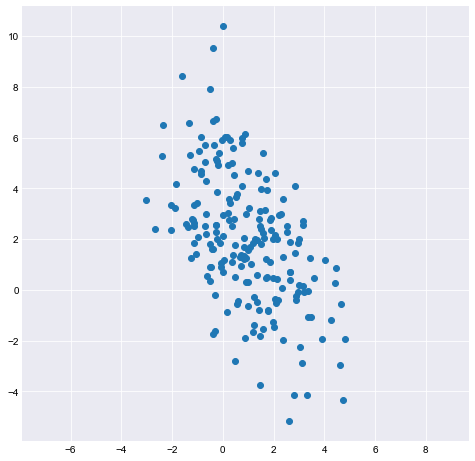

In [2]:
# [PCA_lecture/PCA.ipynb at master · contaconta/PCA_lecture](https://github.com/contaconta/PCA_lecture/blob/master/PCA.ipynb)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

Cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)

plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

(-8.0719551357548482,
 8.8741856153939569,
 -3.0914593316846504,
 3.4424185194844279)

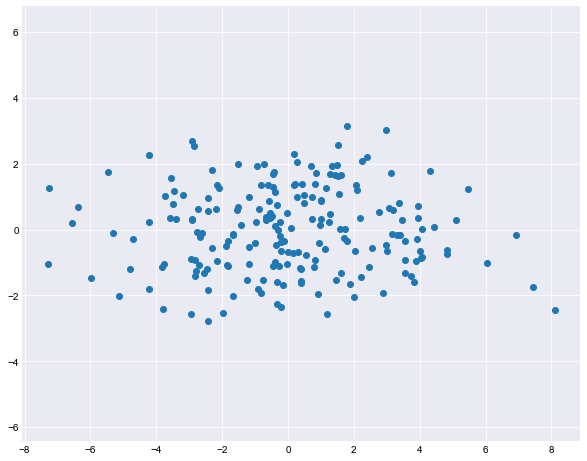

In [3]:
pca = PCA()
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.axis('equal')

In [4]:
# [05_PythonでPCA](http://i.cla.kobe-u.ac.jp/murao/class/2015-SeminarB3/05_Python_de_PCA.pdf)
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

data = pd.read_csv('sample.csv', sep=',', index_col='name')

# prepare PCA
pca = PCA(n_components=2, whiten=False)
pca.fit(data[:-1])

# data compression into the principal component space
x = pca.transform(data[:-1])

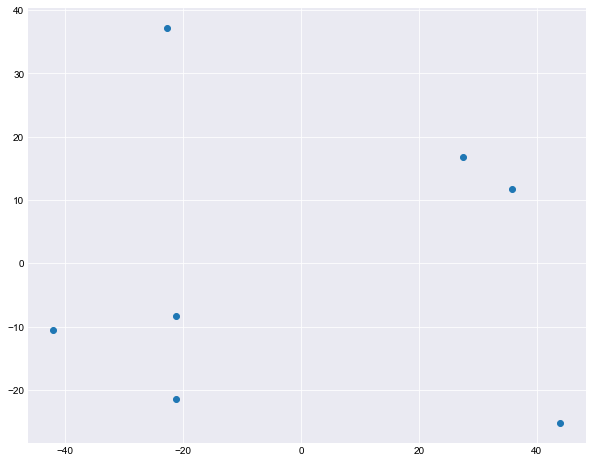

In [5]:
# plotting
# plt.figure(figsize=(10,8))
# data.plot.bar(figsize=(16,8), fontsize=20)
plt.figure(figsize=(10,8))
plt.scatter(x[:,0], x[:,1])

In [6]:
# number of principal component
print(pca.n_components_)

# confirm contribution ratio
print(pca.explained_variance_ratio_)

# cnfirm factor load amount 
print(pca.components_)

# contribute ratio
np.cumsum(pca.explained_variance_ratio_)

2
[ 0.6688013   0.28791087]
[[-0.04318455 -0.11661043  0.55136578  0.60073709  0.56537406]
 [-0.84543226 -0.51948621 -0.08791982 -0.08720053  0.00667425]]


array([ 0.6688013 ,  0.95671218])

In [7]:
print(x)
print(x[:,0])

[[-21.21097689 -21.47715546]
 [ 35.71460142  11.68959258]
 [-42.0704435  -10.53162768]
 [-22.74370588  37.14882026]
 [-21.22256751  -8.3637958 ]
 [ 27.54978153  16.81652223]
 [ 43.98331082 -25.28235614]]
[-21.21097689  35.71460142 -42.0704435  -22.74370588 -21.22256751
  27.54978153  43.98331082]


([], <a list of 0 Text yticklabel objects>)

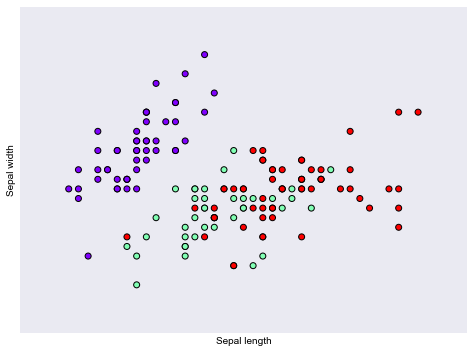

In [33]:
### [The Iris Dataset — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

### import iris data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.rainbow, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

[]

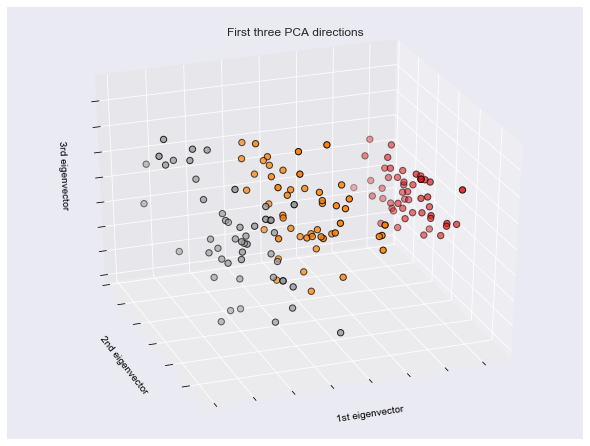

In [37]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

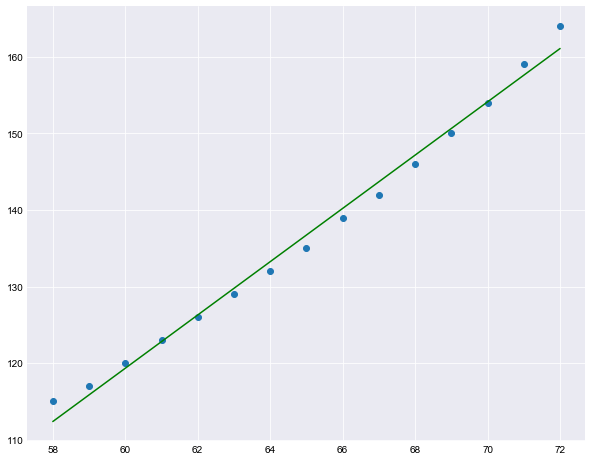

In [114]:
### [[Python][Scikit-learn]主成分分析を用いた次元削減、主成分ベクトルを用いた予測と線形回帰による予測の比較 ｜ Developers.IO](http://dev.classmethod.jp/statistics/pythonscikit-learn-pca1/)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

datum = np.loadtxt("women.tsv", delimiter="\t", usecols=(1,2), skiprows=1)
# test = pd.read_csv("women.tsv", delimiter="\t")
weights = np.transpose(datum)[0]
heights = np.transpose(datum)[1]

pca = PCA(n_components = 1)
pca.fit_transform(np.transpose(np.array([weights, heights])))
pca.get_covariance()
pca.explained_variance_ratio_
s = pca.components_[0]
s

plt.figure(figsize=(10,8))
plt.plot(weights, heights, "o")
plt.plot(weights, np.mean(heights) + s[1]/s[0] * (weights - np.mean(weights)), "g")
# plt.plot(weights, s[1]/s[0] * (weights - np.mean(weights)), "b")
# plt.plot(weights, s[1]/s[0] * (weights - np.mean(weights)), "b")
plt.show()

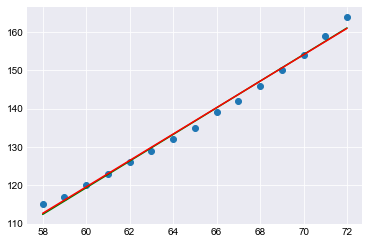

In [116]:
alpha = -87.43
beta = 3.45

fig = plt.figure()
plt.plot(weights, heights, "o")
plt.plot(weights, np.mean(heights) + s[1] / s[0] * (weights - np.mean(weights)), "g")
plt.plot(weights, alpha + beta * weights, "r")

In [135]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
len(k_means.labels_[::])
len(k_means.labels_[::2])
len(k_means.labels_[::10])

15

In [149]:
import scipy as sp
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)
X = face.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)

values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape